[代码地址](https://github.com/JozeeLin/ucr-suite-python/blob/master/DTW.ipynb)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
% matplotlib inline

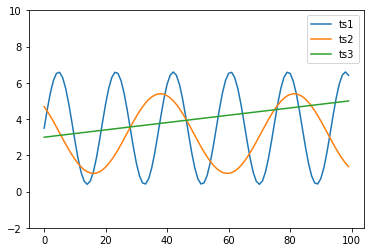

In [2]:
x = np.linspace(0, 50, 100)
ts1 = pd.Series(3.1 * np.sin(x / 1.5) + 3.5)
ts2 = pd.Series(2.2 * np.sin(x / 3.5 + 2.4) + 3.2)
ts3 = pd.Series(0.04 * x + 3.0)

ts1.plot()
ts2.plot()
ts3.plot()

plt.ylim(-2, 10)
plt.legend(['ts1', 'ts2', 'ts3'])

In [3]:
def euclid_dist(t1, t2):
    return np.sqrt(np.sum((t1 - t2) ** 2))

In [7]:
print('euclid_dist ts1 ts2:', euclid_dist(ts1, ts2))
print('euclid_dist ts1 ts3:', euclid_dist(ts1, ts3))

euclid_dist ts1 ts2: 26.95921603796934
euclid_dist ts1 ts3: 23.18924919031106


In [8]:
def DTWDistance(s1, s2):
    DTW = {}
    for i in range(len(s1)):
        DTW[(i, -1)] = float('inf')  #初始化
    for j in range(len(s2)):
        DTW[(-1, j)] = float('inf')

    DTW[(-1, -1)] = 0

    for i in range(len(s1)):
        for j in range(len(s2)):
            dist = (s1[i] - s2[j]) ** 2
            DTW[(i, j)] = dist + min(DTW[(i - 1, j)], DTW[(i, j - 1)], DTW[(i - 1, j - 1)])

    return np.sqrt(DTW[len(s1) - 1, len(s2) - 1])

In [9]:
print('dtw_dist ts1 ts2:', DTWDistance(ts1, ts2))
print('dtw_dist ts1 ts3:', DTWDistance(ts1, ts3))

dtw_dist ts1 ts2: 17.929718468641138
dtw_dist ts1 ts3: 21.549494824404572


In [13]:
def FastDTWDistance(s1, s2, w):
    DTW = {}

    w = max(w, abs(len(s1) - len(s2)))  #window

    for i in range(-1, len(s1)):
        for j in range(-1, len(s2)):
            DTW[(i, j)] = float('inf')
    DTW[(-1, -1)] = 0

    for i in range(len(s1)):
        for j in range(max(0, i - w), min(len(s2), i + w)):
            dist = (s1[i] - s2[j]) ** 2
            DTW[(i, j)] = dist + min(DTW[(i - 1, j)], DTW[(i, j - 1)], DTW[(i - 1, j - 1)])

    return np.sqrt(DTW[len(s1) - 1, len(s2) - 1])

In [19]:
print('fastdtw_dist ts1 ts2:', FastDTWDistance(ts1, ts2, 10))
print('fastdtw_dist ts1 ts3:', FastDTWDistance(ts1, ts3, 10))

fastdtw_dist ts1 ts2: 18.59655183841726
fastdtw_dist ts1 ts3: 22.47248284679103


In [22]:
import collections


def FastDTWDistance2(s1, s2, w):
    DTW = collections.defaultdict(lambda: float('inf'))
    w = max(w, abs(len(s1) - len(s2)))  #window
    DTW[-1, -1] = 0
    for i in range(-1, len(s1)):
        for j in range(-1, len(s2)):
            DTW[(i, j)] = float('inf')
    DTW[(-1, -1)] = 0

    for i in range(len(s1)):
        for j in range(max(0, i - w), min(len(s2), i + w)):
            dist = (s1[i] - s2[j]) ** 2
            DTW[(i, j)] = dist + min(DTW[(i - 1, j)], DTW[(i, j - 1)], DTW[(i - 1, j - 1)])

    return np.sqrt(DTW[len(s1) - 1, len(s2) - 1])

In [23]:
print('fastdtw_dist ts1 ts2:', FastDTWDistance2(ts1, ts2, 10))
print('fastdtw_dist ts1 ts3:', FastDTWDistance2(ts1, ts3, 10))

fastdtw_dist ts1 ts2: 18.59655183841726
fastdtw_dist ts1 ts3: 22.47248284679103


In [24]:
def LB_Keogh(s1, s2, r):
    '''
    注意：这里使用LB_KeoghEQ失效，所以使用LB_KeoghEC
    s1:Q
    s2:C
    r: windows
    '''

    LB_sum = 0
    for ind, i in enumerate(s1):
        lower_bound = min(s2[(ind - r if ind - r >= 0 else 0):ind + r])
        upper_bound = max(s2[(ind - r if ind - r >= 0 else 0):ind + r])

        if i > upper_bound:
            LB_sum = LB_sum + (i - upper_bound) ** 2
        elif i < lower_bound:
            LB_sum = LB_sum + (i - lower_bound) ** 2

    return np.sqrt(LB_sum)

In [25]:
print('LB_Keogh ts1 ts2:', LB_Keogh(ts1, ts2, 20))
print('LB_Keogh ts1 ts3:', LB_Keogh(ts1, ts3, 20))

fastdtw_dist ts1 ts2: 6.253892351594148
fastdtw_dist ts1 ts3: 19.959547869419758


In [26]:
#剪枝失效
print('LB_Keogh ts2 ts1:', LB_Keogh(ts2, ts1, 20))
print('LB_Keogh ts3 ts1:', LB_Keogh(ts3, ts1, 20))

LB_Keogh ts2 ts1: 0.0
LB_Keogh ts3 ts1: 0.0


In [27]:
import re
import math


def ConvertELogStrToValue(eLogStr):
    """
    convert string of natural logarithm base of E to value
    return (convertOK, convertedValue)
    eg:
    input:  -1.1694737e-03
    output: -0.001169
    input:  8.9455025e-04
    output: 0.000895
    """

    (convertOK, convertedValue) = (False, 0.0)
    foundEPower = re.search("(?P<coefficientPart>-?\d+\.\d+)e(?P<ePowerPart>[-+]\d+)", eLogStr, re.I)
    #print "foundEPower=",foundEPower
    if (foundEPower):
        coefficientPart = foundEPower.group("coefficientPart")
        ePowerPart = foundEPower.group("ePowerPart")
        #print "coefficientPart=%s,ePower=%s"%(coefficientPart, ePower)
        coefficientValue = float(coefficientPart)
        ePowerValue = float(ePowerPart)
        #print "coefficientValue=%f,ePowerValue=%f"%(coefficientValue, ePowerValue)
        #math.e= 2.71828182846
        # wholeOrigValue = coefficientValue * math.pow(math.e, ePowerValue)
        wholeOrigValue = coefficientValue * math.pow(10, ePowerValue)

        #print "wholeOrigValue=",wholeOrigValue;

        (convertOK, convertedValue) = (True, wholeOrigValue)
    else:
        (convertOK, convertedValue) = (False, 0.0)

    return (convertOK, convertedValue)

In [31]:
ConvertELogStrToValue('-1.1694737e-03')[1]

-0.0011694736999999999

In [29]:
ConvertELogStrToValue('1.1607272e+000')[1]

1.1607272